In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

## 加载MNIST数据

In [2]:
from sklearn.datasets import fetch_mldata
same_directory_data_path='./datasets'
parent_directory_data_path='../datasets'
mnist=fetch_mldata('MNIST original',data_home=parent_directory_data_path)
mnist

d:\program files\python367\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
d:\program files\python367\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
X,y=mnist['data'],mnist['target']
X.shape
y.shape

(70000, 784)

(70000,)

(-0.5, 27.5, 27.5, -0.5)

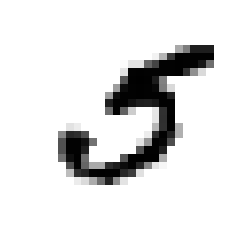

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit=X[36000]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis('off')

创建__训练集__与__测试集__

In [5]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]
X_train.shape
y_train.shape

X_test.shape
y_test.shape

(60000, 784)

(60000,)

(10000, 784)

(10000,)

打乱__训练集__

In [6]:
import numpy as np

shuffle_index=np.random.permutation(60000)
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

In [7]:
# 【api测试】permutation
import numpy as np
ary=np.arange(9)
aryd=np.arange(0,25,3)
ary3x3 = np.arange(9).reshape((3, 3))
per_index=np.random.permutation(3)
aryb=ary3x3[per_index]
aryc=(ary3x3[per_index])
ary
per_index
aryb
aryc
aryd

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

array([1, 0, 2])

array([[3, 4, 5],
       [0, 1, 2],
       [6, 7, 8]])

array([[3, 4, 5],
       [0, 1, 2],
       [6, 7, 8]])

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24])

## 训练一个二分器

__简化问题__，只尝试去识别一个数字

为该分类任务创建目标向量

In [8]:
y_train
y_train_5=y_train==5
y_test_5=y_test==5

y_train_5
y_test_5

array([1., 6., 3., ..., 2., 2., 6.])

array([False, False, False, ..., False, False, False])

array([False, False, False, ..., False, False, False])

In [9]:
# 【运算符测试】
aryb_5=ary==5
ary == aryd
result=sum(ary == aryd)
result

array([ True, False, False, False, False, False, False, False, False])

1

挑选一个分类器去训练它`SGDClassifter`
该分类器的好处
- 因为一次只处理一条数据
- 所以能够高效地处理非常大的数据集
- 适合在线学习

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

d:\program files\python367\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
# 预测
sgd_clf.predict([some_digit])

array([ True])

## 对性能的评估

### 使用交叉验证测量准确性


实现自己版本的__交叉验证__，为了更多的控制权

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skflods=StratifiedKFold(n_splits=3,random_state=42)
for train_index,test_index in skflods.split(X_train,y_train_5):
#     第一步：克隆模型
    clone_clf=clone(sgd_clf)    
    
#     第二步：用训练集的训练分类来训练模型
    x_train_flods=X_train[train_index]
    y_train_flods=y_train_5[train_index]
    clone_clf.fit(x_train_flods,y_train_flods)
    
#     第三步：用模型预测测试集得到测试结果
    x_test_flod=X_train[test_index]
    y_pred=clone_clf.predict(x_test_flod)
    
#     第四步：将测试结果与测试分类进行对比，并算出性能
    y_test_flod=y_train_5[test_index] 
    n_correct=sum(y_pred==y_test_flod)
    print(n_correct/len(y_pred))

d:\program files\python367\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

0.94695


d:\program files\python367\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

0.96485


d:\program files\python367\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

0.96875


使用scikit-learn的`cross_val_score`来评估`SGDClassifier`模型

In [13]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')


d:\program files\python367\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
d:\program files\python367\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
d:\program files\python367\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max

array([0.94695, 0.96485, 0.96875])

### 混淆矩阵
大体思路如下：
- 输出类别A被分类成类别B的次数
 - 例：为了知道分类器将5误分成3的次数，你需要查看混淆矩阵的第五行第三列
- 将一系列的__预测值__与__真实值__做比较
- 使用`cross_val_predict()`函数来进行模型预测

In [14]:
from sklearn.model_selection import cross_val_predict

y_train_predict=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)
y_train_predict

d:\program files\python367\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
d:\program files\python367\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
d:\program files\python367\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max

array([False, False, False, ..., False, False, False])

使用`confusion_matrix()`函数，得到一个__混淆矩阵__

混淆矩阵中的每一行表示一个__实际的类__，每一列表示一个__预测的类__

该例为一个二分类，所以结果为一个2x2的矩阵
- 第一行认__非5__中的__53891__张被正确归类为__非5__，而其余__688__张被错误归类为__是5__类
- 第二行认为__是5__中的__1413__张被错误志归类为__非5__，其余__4008__张正确分类为__是5__类
- 第一个实际分类为__非5__，第一行表示，即为反例,N
- 第二个实际分类为__是5__，第二行表示，即为正例,P
- 第一个预测分类为__非5__，第一列表示，即为反例,N
- 第二个预测分类为__是5__，第二列表示，即为正例,P
- 反反为真反例，正正为真正例

$$\begin{bmatrix}实非5+预非5=归正确(TN)&实非5+预是5=归错误(FP)\\实是5+预非5=归错误(FN)&实是5+预是5=归正确(TP)\end{bmatrix}$$

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_predict)

array([[53993,   586],
       [ 1803,  3618]], dtype=int64)

混淆矩阵提供的信息__指标__
- 分类器的__准确率__(precision),也叫正例预测的__精度__
$$precision=\frac{TP}{TP+FP}(TP是真正例的数目，FP是假正例的数目)$$
- 召回率(recall),也叫敏感度(sensitivity)或者真正例率(true positive rate,简称TPR)
$$recall=\frac{TP}{TP+FN}(FN是假反例的数目)$$

以下为一个完美的分类器将只有真反例和真正例，

所以混淆矩阵的非零值仅在其主对角线（左上至右下）

In [16]:
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

### PR曲线（准确率与召回率）
计算分类器指标
- 准确率
- 召回率
- 不能同时拥有两者。增加准确率会降低召回率，反之亦然。这叫做准确率与召回率之间的折衷

数字5探测器性能
- 当它声明某张图片`是5`的时候，它有__86%__的可能性是正确的
- 而且，它只检测出`是5`类图片中的__70%__

In [17]:
from sklearn.metrics import precision_score,recall_score

precision_score(y_train_5,y_train_predict)
recall_score(y_train_5,y_train_predict)

0.8606089438629876

0.667404537908135

结合准确率和召回率的指标叫做__F1值__
- 它比较两个分类器的优劣
- 它是准确率和召回率的的__调和平均__
 - 普通平均，平等地看待所有的值
 - 调和平均，会给小的值更在的权重
- 一个高的__F1值__，需要召回率和准确率同时高 
$$F1=\frac{2}{\frac{1}{precision}+\frac{1}{recall}}=2*\frac{precision*recall}{precision+recall}=\frac{TP}{TP+\frac{FN+FP}{2}}$$


计算__F1值__

In [18]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_predict)

0.7517922077922077

应用场景：
- 关心准确率(高准确率)
 - 举例
   - 如果训练一他分类器去检测视频是否适合儿童，会倾向选择那种即便拒绝子很多好视频，但保证所保留的视频都是好的
- 关心召回率
 - 举例
   - 训练一个分类器去检测监控图像当中的窃贼，有着30%的准确率、99%的召回率是合适的(警卫会得到一些错误的报警，但几乎所有的窃贼都会被抓到)

### 准确率/召回率之间的折衷
如何做分类决策？
- 每个样例，根据决策函数计算__分数__
- 将样例的__分数__从到大排列
- 分数大于一个__阈值__，分配给正例，否则分配给反例
![abc](./imgs/chapter3.3-3.jpeg)

实现可设置阈值，设置__决策分数__方法
- 使用`decision_function()`方法，返回样例的__分数值__
- 基于__分数值__，使用任何__阈值__，并做出__预测__
- `SGDClassifier`用了一个等于 0 的阈值，所以前面的代码返回了跟`predict()`方法一样的结果

In [19]:
y_score=sgd_clf.decision_function([some_digit])
y_score

threshold=0
y_some_digig_predict=y_score>threshold
y_some_digig_predict

# 提高阈值会降低召回率
# 准确率将有所下降
threshold=200000
y_some_digig_predict=y_score>threshold
y_some_digig_predict

array([275597.56004277])

array([ True])

array([ True])

如何正确使用__阈值__？
- 首先,使用`cross_val_predict()`得到每个样例的分数值，指定返回__决策分数__
- 其次，使用`precision_recall_curve()`计算__准确率__和__召率__
- 最后，使用Matplotlib画出准确率的召回率,把__准确率__和__召回率__当作是关于阈值的一个__函数__
- 根据__阈值__的__调整__非常容易创建一个任意__准确率__的__分类器__

d:\program files\python367\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
d:\program files\python367\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
d:\program files\python367\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max

array([-501927.45033637, -299970.97294096, -297655.6380388 , ...,
       -807654.88923747, -894144.92152618, -907751.05887015])

array([0.09051292, 0.09049774, 0.09049925, ..., 1.        , 1.        ,
       1.        ])

array([1.00000000e+00, 9.99815532e-01, 9.99815532e-01, ...,
       3.68935621e-04, 1.84467810e-04, 0.00000000e+00])

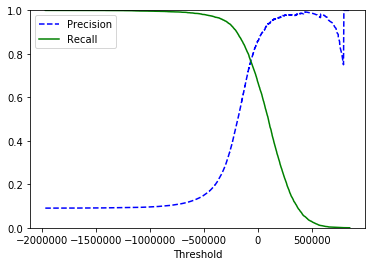

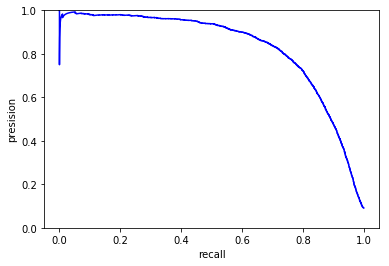

In [20]:
# 首先
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')

y_scores
# 其次
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)
precisions
recalls
# 最后
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

def plot_precision_recall(precisions,recalls):
    plt.plot(recalls,precisions,'b-')
    plt.xlabel('recall')
    plt.ylabel('presision')
    plt.ylim([0, 1])

    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

plot_precision_recall(precisions,recalls)
plt.show()

In [39]:
y_scores
y_train_pred_90 = (y_scores > 180000)
y_train_pred_90

precision_score(y_train_5,y_train_pred_90)
recall_score(y_train_5,y_train_pred_90)

array([-501927.45033637, -299970.97294096, -297655.6380388 , ...,
       -807654.88923747, -894144.92152618, -907751.05887015])

array([False, False, False, ..., False, False, False])

0.9623541887592789

0.33480907581627006

### ROC曲线（受试者工作特征）
ROC曲线是__真正例率__，对__假正例率__的曲线
- 真正例率(TPR)，也叫做召回率
- 假正例率(FPR)，是反例被错误分成正例的比率，它等于1减去真反例率(TNR)
- 真反例率(TNR)，是反例被正确分类的比率，也叫做特异性
- roc曲线，画出__召回率__对1减去特异性的__值__的曲线

画roc曲线
- 首先，使用`roc_curve()`函数，计算各种不同阈值下的TPR、FPR
- 接着，使用matplotlib,画出FPR对TPR的曲线，进行观察
 - TPR越高，分类器就会产生越多的FPR
 - 点线是一个完全随机的分类器生成的roc曲线
 - 好分类器的roc曲线应该尽可能远离这条线（即向左上角方向靠拢）

比较分类器间的优劣
 - 测量roc曲线下的面积(AUC)
 - 完美分类器的auc等于1，
 - 一个纯随机分类器的auc等于0.5

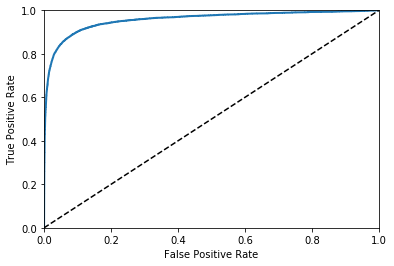

In [22]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr,tpr)
plt.show()

In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9571740026259058

__ROC曲线__与__RP曲线__，如何决定使用哪一个呢？
- 优先使用__RP曲线__，当正例很少，或者假正例多于反例的时候
- 其他情况使用__ROC曲线__

`predict_proba()`返回一个数组，数组的每一行代表一个样例，每一列代表一个类。数值当中的值的意思是：给定一个样例属于给定类的概率

In [29]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)

# 得到样例属于给定类的概率
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method='predict_proba')
y_probas_forest

d:\program files\python367\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
d:\program files\python367\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
d:\program files\python367\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ]])

In [43]:
# 使用正例的概率当作样例的分数，因为画ROC曲线需要的是样例分数
y_scores_forest=y_probas_forest[:,1]
y_scores_forest

# 准备ROC曲线数据，计算各种不同阈值下的 TPR、FPR
fpr_forest,tpr_forest,threshold_forest=roc_curve(y_train_5,y_scores_forest)

array([0. , 0. , 0. , ..., 0.1, 0. , 0. ])

array([2. , 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

d:\program files\python367\lib\site-packages\matplotlib\legend.py:497: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


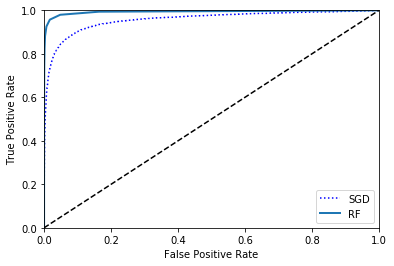

In [45]:
# 比较SGDClassifier与RandomForestClassifier的ROC曲线
plt.plot(fpr,tpr,'b:',label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,'RF')
plt.legend(loc='bottom right')
plt.show()

In [42]:
precision_score(y_train_5,y_scores_forest>0)
recall_score(y_train_5,y_scores_forest>0)

print('RF的ROC_AUC:')
roc_auc_score(y_train_5,y_scores_forest)


print('SGD的ROC_AUC:')
roc_auc_score(y_train_5,y_scores)

RF的ROC_AUC:


0.993326999732341

0.3752873162917044

0.993912562257886

SGD的ROC_AUC:


0.9571740026259058

### 训练一个分类器
1. 选择合适的标准，使用交叉验证去评估你的分类器
- 选择满足你需要的准确率/召回率折衷方案
- 比较不模型的ROC曲线
- ROC AUC数值

## 多类分类
- 一些算法可以直接处理__多类分类__问题，比如__随机森林分类器__、__朴素贝叶斯分类器__
- 一些算法则是严格的__二分类器__，比如__SVM分类器__、__线性分类器__
- 有许多__策略__可以让__二分类器__去执行__多类分类__
 - OvA策略，也叫__一对其他__或__一对所有__
   - 例，创建一个可以将图片分类成10类的系统
     - 首先，训练10个二分类器，每一个对应一个数字（探测0，探测1，探测2）
     - 然后，让每个分类器对某张图片进行分类，选出决策分数最高的那个分类器
 - OvO策略，也叫__一对一__。对一对数字都训练一个二分类器
   - 一个分类器用来处理数字0和数字1，一个分类器用来处理数字0和2，一个用来处理数字1和2
   - 如果有N个类，需要训练N*(N-1)/2个类器
   - 主要优点是，每个分类器只需要在训练集的部分数据上进行训练
- 一些算法在训练集的大小上很难扩展(比如SVM分类器)，所以对于这些算法，OvO是比较好的，因为它在小的数据集上可以更多的训练，对于大部分二分类器来说，OvA是更好的选择

### Scikit-Learn可以探测出你想使用一个二分类器去完成多分类的任务，它会自动执行OvA(除了SVM器，它使用OvO)

In [46]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

d:\program files\python367\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

array([5.])